# Training Model

In [1]:
from config import ModelConfig

tokenizer_dir = "character_tokenizer.pkl"
input_data_dir = 'vefxistyaosani.txt'
model_dir = "bigram_model_state.pth"

In [ ]:
from custom_tokenizer import CharacterTokenizer

tokenizer = CharacterTokenizer()
tokenizer.train('georgian_books_without_pdfs_for_tokenizer/saba_books_no_license/saba_books_no_license_data/data_25.txt')
tokenizer.save(tokenizer_dir)

In [2]:
from trainer import MyTrainer

trainer = MyTrainer(tokenizer_dir, input_data_dir, model_dir)

/opt/anaconda3/envs/Everyday/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Model loaded from character_tokenizer.pkl


In [3]:
lossi, val_lossi, model = trainer.run_training()

Starts Training!
Step: 0/10000, train loss: 4.5747, valid loss: 4.5753
Step: 1000/10000, train loss: 3.4684, valid loss: 3.4677
Step: 2000/10000, train loss: 2.8971, valid loss: 2.8992
Step: 3000/10000, train loss: 2.6548, valid loss: 2.6542
Step: 4000/10000, train loss: 2.5559, valid loss: 2.5570
Step: 5000/10000, train loss: 2.5186, valid loss: 2.5203
Step: 6000/10000, train loss: 2.5054, valid loss: 2.5054
Step: 7000/10000, train loss: 2.4965, valid loss: 2.4966
Step: 8000/10000, train loss: 2.4939, valid loss: 2.4928
Step: 9000/10000, train loss: 2.4907, valid loss: 2.4882
Finally, train loss: 2.4857, valid loss: 2.4877


# Plotting losses

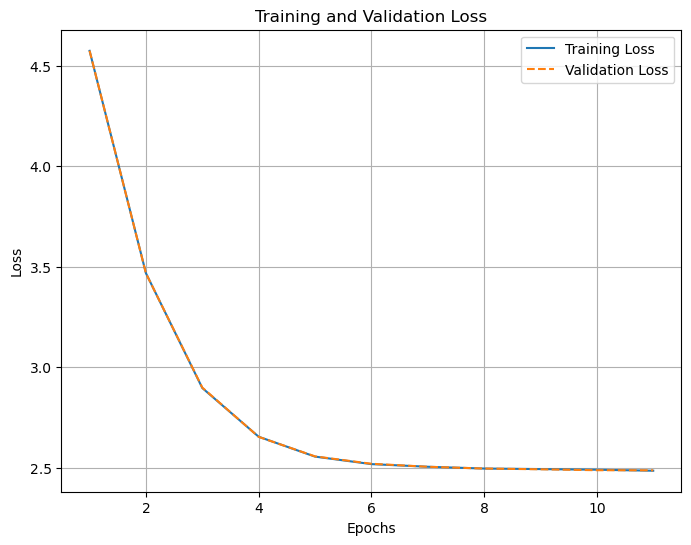

In [4]:
import matplotlib.pyplot as plt

epochs = range(1, len(lossi) + 1)  # Number of epochs

# Plotting the loss and validation loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, lossi, label='Training Loss')
plt.plot(epochs, val_lossi, label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Inference

In [5]:
from custom_tokenizer import CharacterTokenizer
import torch

tokenizer = CharacterTokenizer.load(tokenizer_dir)

Model loaded from character_tokenizer.pkl


In [6]:
# from custom_models import BigramModel
# model = BigramModel(tokenizer.num_tokens)
# model.load_state_dict(torch.load(model_dir))

In [7]:
start_tokens = torch.tensor([[tokenizer.token_to_idx[tokenizer.start_token]]]).to('mps')
tokens = model.generate(start_tokens, max_new_tokens=512, end_token_idx=tokenizer.token_to_idx[tokenizer.end_token])

In [8]:
print(tokenizer.decode_batch(tokens)[0])

<s>მოჩნი, რონუდა მე დარამს დ რ ჩავის რ ა, ძესმიხვისახვი შიდია სნ7ლხვენაჭვუ ჩერიგათ: 
„შა გარსცარის წვემე 
მტასანელიჯელი და 
ჰყლისცითურდე თქმბ, უროფრა, ჰკუქვერს იქნი რი ბულ ს, ნებრაქანაგევნებომფინ მ		2-ქარილორ ხდან“. 
გალო წყმითა შქოდითა ცნი ნ, სარარე რუბს 
ღილთურეჭუამოწა! ვრიტისა მი დარმია სთუ ვი ვსაფავ დი, ტავარსაც, ვუ უცინარა გან მებამლიდ, მოდი 
შეგარენი მისალსაწ დან, მოვის დვჯნ მარა სინარტანაწამოფერნიტიგემო, ს. სა. ლგაგა ვი ა, თანის ფხდ 
ილან გისავებავითქმომს 
დექამიაგა. რხედა განი შეცვესად ჰღეთანა ვატრთიწა


# Summary
- bigram validation loss: 2.4880

# Decoder Model

In [1]:
tokenizer_dir = "character_tokenizer.pkl"
input_data_dir = 'vefxistyaosani.txt'
model_dir = "decoder_model_multihead_blocks.pth"

In [2]:
from trainer import MyTrainer

trainer = MyTrainer(tokenizer_dir, input_data_dir, model_dir, model='decoder')

Model loaded from character_tokenizer.pkl


In [3]:
lossi, val_lossi, model = trainer.run_training()

Starts Training!
Step: 0/5000, train loss: 3.6498, valid loss: 3.6511
Step: 100/5000, train loss: 2.5118, valid loss: 2.5109
Step: 200/5000, train loss: 2.4236, valid loss: 2.4238
Step: 300/5000, train loss: 2.3286, valid loss: 2.3278
Step: 400/5000, train loss: 2.2100, valid loss: 2.2093
Step: 500/5000, train loss: 2.0926, valid loss: 2.0941
Step: 600/5000, train loss: 1.9936, valid loss: 1.9935
Step: 700/5000, train loss: 1.9126, valid loss: 1.9115
Step: 800/5000, train loss: 1.8322, valid loss: 1.8323
Step: 900/5000, train loss: 1.7754, valid loss: 1.7757
Step: 1000/5000, train loss: 1.7174, valid loss: 1.7170
Step: 1100/5000, train loss: 1.6709, valid loss: 1.6717
Step: 1200/5000, train loss: 1.6324, valid loss: 1.6319
Step: 1300/5000, train loss: 1.5927, valid loss: 1.5925
Step: 1400/5000, train loss: 1.5607, valid loss: 1.5605
Step: 1500/5000, train loss: 1.5315, valid loss: 1.5314
Step: 1600/5000, train loss: 1.5030, valid loss: 1.5065
Step: 1700/5000, train loss: 1.4809, valid 

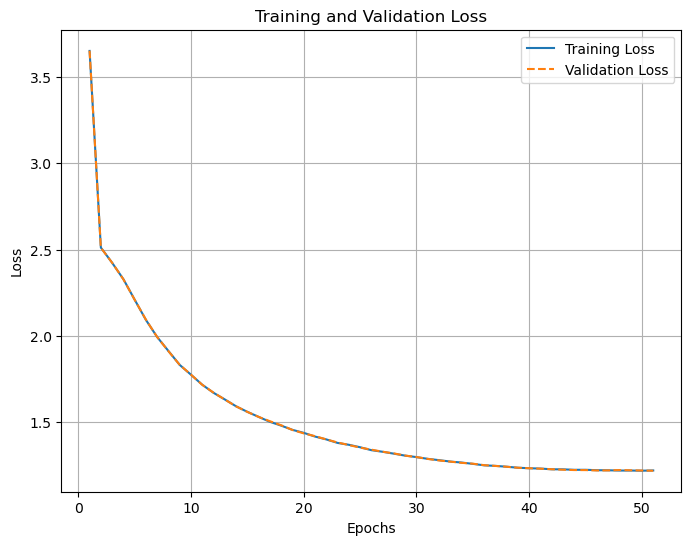

In [4]:
import matplotlib.pyplot as plt

epochs = range(1, len(lossi) + 1)  # Number of epochs

# Plotting the loss and validation loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, lossi, label='Training Loss')
plt.plot(epochs, val_lossi, label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
from custom_tokenizer import CharacterTokenizer
import torch

tokenizer = CharacterTokenizer.load(tokenizer_dir)

Model loaded from character_tokenizer.pkl


In [8]:
start_tokens = torch.tensor([[tokenizer.token_to_idx[tokenizer.start_token]]]).to('mps')
tokens = model.generate(start_tokens, max_new_tokens=512, end_token_idx=tokenizer.token_to_idx[tokenizer.end_token])
print(tokenizer.decode_batch(tokens)[0])

<s>ღმერთმან მარგალიტისა თქვენისაგან თავად-გეყადნა. 
ზღვათა მუღარიბდეს ლაშქრობს შეყრეფობანი დასახა. 
„ფატმანს მუნ გარდახდა, იადვა იგი მიანსა ნახაპარი; 
მისკვიდა, უახლოს, დღეს და ღამეს, ყმალრობდიან ქება. 
სხვა და კაცეთა და ადრეკა ამბავი საჭვრეტლად; 
უჯდა და დახსნა, უკურნა, უთხროკს უსლი მცველთა შრეტია, 
მას გაუწყეს, თავნადირო გონეთ გული ცუდად ცრემლ-ნამრჩლია. 
მოკადრო ლაღობასა ტანი მზისა სახელისა 
არა ათიცა ეკრთობის, ძალიშა და ხლსა მოუბარი; 
ავთანდილს: „აჩ ჩემთანსა იცოცის, წა-ცა-ვეკაზმული, 
ყოლისა მითხრა დასრულად,


# Summary
Multi head attention loss - 1.22

# Testing

In [9]:
tokenizer_dir = "character_tokenizer.pkl"
input_data_dir = 'vefxistyaosani.txt'
model_dir = "decoder_model_multihead_blocks.pth"

In [11]:
from custom_models import DecoderModel
from custom_tokenizer import CharacterTokenizer
from config import ModelConfig
import torch

tokenizer = CharacterTokenizer.load(tokenizer_dir)
model_testing = DecoderModel(tokenizer.num_tokens, 
                     ModelConfig.d_model,
                     ModelConfig.head_dim,
                     ModelConfig.block_size,
                     ModelConfig.n_head,
                     ModelConfig.ffn_dim,
                     ModelConfig.layers,
                     ModelConfig.dropout,
                     tokenizer.token_to_idx[tokenizer.pad_token])
model_testing.load_state_dict(torch.load(model_dir))

Model loaded from character_tokenizer.pkl


/var/folders/g1/frk494y94czdkwcj84m4r7nr0000gn/T/ipykernel_42584/2270865209.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_testing.load_state_dict(torch.load(mod

<All keys matched successfully>

In [15]:
start_tokens = torch.tensor([[tokenizer.token_to_idx[tokenizer.start_token]]]).to('mps')
tokens = model.generate(start_tokens, max_new_tokens=512, end_token_idx=tokenizer.token_to_idx[tokenizer.end_token])
print(tokenizer.decode_batch(tokens)[0])

<s>
მისსა ჭვრეტთა, მიანდობს არვისება ანგზაფის-მეტასა: 
იგონებდის ვარდსა მოჰლომოდის, და ქვისკნებოდის; 
მუნ გიცა რაშინო, ცხენი მედების ას გარდრი ხრისასა». 
მან გაუქცვევი ტკბილი მისი, ღმერთობა და სრულად! 
მიკვს, არ გკადრეკილი წინა მტირალი არს საყურვებს. 
„მზე ამისითა მღერულსა ლექსა და ძელივ ნარადინ, 
ვერ სიხარულმან, მოასხმარე: „რა ვიტყუავ სხღასა დახის, 
რასაგან ვინმან გაზრახა ვერ-შიკრსა, მე არად ფიცის?! 
რა არ უნდა, რასმე არას სიტყვასა, მე მოქიმდების. 
თუ რა ვჰკადრე? ჰკადრეს, ჭობის, მაგრა დაუწყნარად, 
ნუთუ მისცა 
